文本向量化

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import jieba
import re
import pandas as pd
import numpy as np


In [2]:
file_path = r"/Users/pengyitong/Documents/大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析/数据/xiaomi.csv"
df = pd.read_csv(file_path)
df

,用户名,内容,点赞量,日期
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024-03-30 12:22:53
1,及米侠,感觉这次黑稿不太多，看来车圈还是更干净一些！,1725,2024-03-30 12:23:26
2,小麦Elite,小米手机1代回忆～,1020,2024-03-30 12:22:38
3,米12U,雷总辛苦了 感谢您为大家做了一辆Dream car,660,2024-03-30 12:22:39
4,Spider_boy666,雷总加电,650,2024-03-30 12:23:00
...,...,...,...,...
4568,春夏秋冬湖,欢迎雷军🍉,0,2024-05-18 19:58:08
4569,四季的暖窝,雷总，能不能发售ARE U OK大字母 运动包 能不能开MI家HOTEL，用SU7接送客人到MI家,0,2024-05-18 19:48:31
4570,米粉玩车局,中国平安的平安车险，未经本人允许，滥用本人姓名、电话、身份证信息，连续一个月车险客服电话骚扰...,0,2024-05-18 17:45:00
4571,浦东机场上空的轰鸣,不想体验你们的最新科技，雷嗨,0,2024-05-18 17:42:53


In [3]:
# 删除 '内容' 列中包含空值的所有行
df = df.dropna()

# 删除重复
df = df.drop_duplicates()
df.shape

(3591, 4)

二、分词（jieba）& 停用词

In [5]:

#定义停用词列表

stopwords_file = '/Users/pengyitong/Documents/大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析/数据/stopwords_cn.txt'
stopwords=[]

#读取停用词文件并添加到停用词列表
with open(stopwords_file,'r', encoding='utf-8') as f:
    for line in f: # 遍历文件中的每一行
        stopwords.append(line.strip())

#分词处理函数，包括去除停用词和标点符号
def tokenize(text):
    if not isinstance(text, str):
        return np.nan # 这行代码检查输入的文本是否是字符串类型
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stopwords and word.strip()] # 那些不在停用词列表中且不为空白字符的词语才会被保留
    filtered_text = '/'.join(filtered_words) #分词之间用斜杠分隔
    filtered_text_no_punctuation = re.sub(r'[^\w\s]','', filtered_text)
    filtered_text_no_extra_punctuation = re.sub(r'[\s+\.\!\/_,$%^*(+\"\')]+|[+——()?【】“”！，。？、~@#￥%……&*（）《》：]+', '', text)
    return filtered_text_no_extra_punctuation.split('/') #返回分词后的列表形式，词之间用斜杠分隔
    return filtered_text


df['内容'] = df['内容'].apply(lambda x: str(x) if pd.notnull(x) else '')
# 这一行代码的作用是确保review列中的每个值都被转换为字符串类型，并处理可能存在的缺失值（NaN）

# 对每一行文本进行分词处理，使用 apply 函数
df['tokenized_text'] = df['内容'].apply(tokenize)


# 遍历整张表格
words = []
for i,row in df.iterrows():
    word = jieba.cut(row['内容'])
    result = ' '.join(word)
    words.append(result)
# print(words)
vect = CountVectorizer()
X = vect.fit_transform(words)
X = X.toarray()

words_bag = vect.vocabulary_

# vect = CountVectorizer()
# X_test = vect.fit_transform(words)
# X_test是词频矩阵
# print(X_test)
# 查看词袋

words_bag

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/jieba.cache
Loading model cost 0.368 seconds.
Prefix dict has been built successfully.


{'小米': 2914,
 'su7': 365,
 '强势': 3230,
 '破圈': 5185,
 '火爆': 4763,
 '总得': 3403,
 '抓紧': 3653,
 '提高': 3865,
 '产能': 1010,
 '感觉': 3483,
 '这次': 6298,
 '黑稿': 6960,
 '不太多': 678,
 '看来': 5110,
 '车圈': 6141,
 '还是': 6265,
 '干净': 3076,
 '一些': 424,
 '手机': 3570,
 '回忆': 2312,
 '雷总': 6689,
 '辛苦': 6216,
 '感谢您': 3485,
 '大家': 2509,
 '一辆': 531,
 'dream': 221,
 'car': 203,
 '雷总加': 6696,
 '今天': 1077,
 '早上': 4113,
 '发布会': 1992,
 '尤其': 2934,
 '汽车': 4550,
 '最后': 4216,
 '那个': 6447,
 '鞠躬': 6787,
 '泪目': 4629,
 '相信': 5087,
 '总有一天': 3406,
 '全球': 1412,
 '一条': 491,
 '道路': 6432,
 '看到': 5106,
 '驰骋': 6877,
 '身影': 6121,
 '年轻人': 3108,
 '特别': 4863,
 '喜欢': 2277,
 '定位': 2788,
 '成功': 3492,
 '为了': 845,
 '梦想': 4415,
 '年轻': 3107,
 '人造': 1070,
 '大卖': 2493,
 '体验': 1218,
 '拉满': 3700,
 '驾驶': 6886,
 '爱好者': 4836,
 '首选': 6866,
 '车模': 6162,
 '不能': 733,
 '一点': 504,
 '根本': 4402,
 '买不到': 911,
 '交付': 991,
 '时间': 4129,
 '问题': 6606,
 '网友': 5498,
 '生产': 4941,
 '相机': 5094,
 '价格': 1139,
 '下来': 631,
 '觉得': 5840,
 '可以': 2057,
 '公路': 1438,
 '因为': 2324

In [6]:
# 只看词，不看编号
words_bag2 = vect.get_feature_names_out()
df_wordsfreq = pd.DataFrame(X, columns=words_bag2)
df_wordsfreq

,00,001,007,01,03,10,100,1000,1000g,100w,...,黑马,默认,鼓励,鼓舞,齐全,龙头,龙晶,龙湖,龙科技,龙腾虎跃
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


CountVectorizer 只考虑词的出现次数, TfidfVectorizer 生成的矩阵表示每个词在每个文档中的 TF-IDF 权重

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
words = df['tokenized_text'].apply(lambda x: ' '.join(x)).tolist()

df_words = pd.DataFrame(words)
df_words

,0
0,小米su7强势破圈太火爆了雷总得抓紧提高产能啊
1,感觉这次黑稿不太多看来车圈还是更干净一些
2,小米手机1代回忆～
3,雷总辛苦了感谢您为大家做了一辆Dreamcar
4,雷总加电
...,...
3586,红米还出汽车吗
3587,小米fold3为啥造的
3588,suv
3589,来了来了雷总


In [8]:
# 通用词预处理
X = df_words[0].apply(lambda x: ' '.join(jieba.cut(x)))

file_path = r"D:\MINE\大数据分析综合实验\大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析\数据\stopwords_cn.txt"

with open(file_path, 'r', encoding = 'utf-8') as f:
    stopwords = [line.strip() for line in f]

words = X.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
words

0       小米 su7 强势 破圈 火爆 雷 总得 抓紧 提高 产能
1             感觉 这次 黑稿 不太多 看来 车圈 更 干净
2                      小米 手机 1 代 回忆 ～
3             雷总 辛苦 感谢您 做 一辆 Dreamcar
4                               雷总加 电
                    ...              
3586                            红米 汽车
3587                    小米 fold3 为啥 造
3588                              suv
3589                              雷 总
3590                               第一
Name: 0, Length: 3591, dtype: object

In [9]:
# 初始化TfidfVectorizer实例
vectorizer = TfidfVectorizer()

# 将文档转换为TF-IDF向量，转换完成后，tfidf_matrix是一个稀疏矩阵
tfidf_matrix = vectorizer.fit_transform(words)

# 打印词汇表
print("词汇表：", vectorizer.get_feature_names_out())


# 获取特定词语的索引
word_index = vectorizer. vocabulary_.get('特定词语')
# # 如果该索引存在，则打印其在各个文档中的TF-IDF值
if word_index is not None:
    word_tfidf_values = tfidf_matrix[:, word_index].toarray()
    print("特定词语的TF-IDF值：", word_tfidf_values)

词汇表： ['00' '001' '007' ... '龙湖' '龙科技' '龙腾虎跃']


In [10]:

tfidf_df = tfidf_matrix.toarray()
tfidf = pd.DataFrame(tfidf_df, columns = vectorizer.get_feature_names_out())
tfidf

,00,001,007,03racing,10,100,1000,1000g,1001,100w,...,黑马,默认,鼓励,鼓舞,齐全,龙头,龙晶,龙湖,龙科技,龙腾虎跃
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# from sklearn.preprocessing import StandardScaler
# X_new = StandardScaler().fit_transform(tfidf)

In [12]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(X_new)
# X_pca= pca.transform(X_new)

In [13]:
# pca.components_

In [14]:
tfidf_matrix

<3591x6912 sparse matrix of type '<class 'numpy.float64'>'
	with 23799 stored elements in Compressed Sparse Row format>

这个 TF-IDF 矩阵有 4573 行和 6916 列。
有 28525 个非零元素

聚类

In [35]:
# KMeans
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=10)
k_data = kms.fit_predict(tfidf)
k_data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 9, 1, ..., 8, 9, 9])

In [16]:
words_ary = np.array(words)
words_ary[k_data == 1]

array(['小米 su7 强势 破圈 火爆 雷 总得 抓紧 提高 产能', '年轻人 特别 喜欢 SU7 定位 成功',
       '试驾 SU7 结合 雷总 这段话 会 发现 小米 SU7 人群 定位 相当 清晰 悦己 台车 核心 传播 做到 〔 扬长避短 〕',
       '雷总 特斯拉 ModelS 带 FSD 终身 免费 超充 换台 小米 SU7', '小米 SU7 中国 人民 幸福 梦而造',
       '雷总 特斯拉 开放 5 年 免息 小米 啥时候 开放 买 小米 SU7', '小米 手机用户', '小米 su7 爆求 回复',
       '小米 400 售后 米家 APP 售后 电话 写 一堆 文字 反馈 一点点 效果 推诿 扯皮 雷 总微博 下来 留言 评论 麻烦 小米 厂家 工程师 看到 问题 反馈 以后 将 小米 洗碗机 16 套 P1 固件 升级成 小米 洗碗机 15 套 S1 自主 关闭 自动 开门 功能 自主 选择权 还给 客户 选择',
       '雷总出 su8 su7 已经 满足 不了', '支持 小米 su7 可否 su7 模型 开放 购买',
       '买 su7 钱包 不够 鼓',
       '不要 买 小米 产品 买 小米 洗 烘 一体机 出现 质量 问题 小米 换货 偷工减料 少 功能性 零部件 联系 小米 服务 换货 有少 雷军 微博 下面 发就 联系 过 无法 满足 要求 恢复 成 原来 样子 变成 无法 满足 排水管 手 烫伤 小米 值得 购买 这种 事有 一次 第二次 魔幻',
       '不要 买 小米 产品 买 小米 洗 烘 一体机 出现 质量 问题 小米 换货 偷工减料 少 功能性 零部件 联系 小米 服务 换货 有少 雷军 微博 下面 发就 联系 过 无法 满足 要求 恢复 成 原来 样子 变成 无法 满足 排水管 手 烫伤 小米 值得 购买 这种 事有 一次 第二次 魔幻',
       '国内 势利 朋友 看清楚 小米 从来不 攻击 国内 同行 小米 比亚迪 对外 战争 攻击 小米 黑 小米 收手',
       '雷神 SU7 洗车 模式', '年轻人 第一辆 车 小米 SU7', '小米 SU7 给力', '小米 服务 搞上去',
       '觉得 宝马

In [17]:
# # KMeans(pca)
# from sklearn.cluster import KMeans
# kms = KMeans(n_clusters=10)
# km_pca = kms.fit_predict(X_pca)
# km_pca

In [18]:
# DBSACN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5,min_samples=3)
d_data = dbs.fit_predict(tfidf)
d_data

array([-1, -1, -1, ...,  2,  4, -1], dtype=int64)

In [19]:
# # DBSACN(pca)
# from sklearn.cluster import DBSCAN
# dbs = DBSCAN(eps=0.5,min_samples=3)
# db_pca = dbs.fit_predict(X_pca)
# db_pca

In [20]:
# 将聚类标签添加到DataFrame中
df['DBcluster'] = d_data
# df['DBpcacluster'] = db_pca
df['KMcluster'] = k_data
# df['KMpcacluster'] = km_pca
df.head()

,用户名,内容,点赞量,日期,tokenized_text,DBcluster,KMcluster
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024-03-30 12:22:53,[小米su7强势破圈太火爆了雷总得抓紧提高产能啊],-1,1
1,及米侠,感觉这次黑稿不太多，看来车圈还是更干净一些！,1725,2024-03-30 12:23:26,[感觉这次黑稿不太多看来车圈还是更干净一些],-1,2
2,小麦Elite,小米手机1代回忆～,1020,2024-03-30 12:22:38,[小米手机1代回忆～],-1,9
3,米12U,雷总辛苦了 感谢您为大家做了一辆Dream car,660,2024-03-30 12:22:39,[雷总辛苦了感谢您为大家做了一辆Dreamcar],-1,4
4,Spider_boy666,雷总加电,650,2024-03-30 12:23:00,[雷总加电],-1,2


In [21]:
# 转换 DBcluster 列为数值类型
df['DBcluster'] = pd.to_numeric(df['DBcluster'])

# 提取 DBcluster 列的最高值
max_cluster_value = df['DBcluster'].max()
max_cluster_value

61

In [22]:
count_negative_1 = df[df['DBcluster'] == -1]
count_negative_1

,用户名,内容,点赞量,日期,tokenized_text,DBcluster,KMcluster
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024-03-30 12:22:53,[小米su7强势破圈太火爆了雷总得抓紧提高产能啊],-1,1
1,及米侠,感觉这次黑稿不太多，看来车圈还是更干净一些！,1725,2024-03-30 12:23:26,[感觉这次黑稿不太多看来车圈还是更干净一些],-1,2
2,小麦Elite,小米手机1代回忆～,1020,2024-03-30 12:22:38,[小米手机1代回忆～],-1,9
3,米12U,雷总辛苦了 感谢您为大家做了一辆Dream car,660,2024-03-30 12:22:39,[雷总辛苦了感谢您为大家做了一辆Dreamcar],-1,4
4,Spider_boy666,雷总加电,650,2024-03-30 12:23:00,[雷总加电],-1,2
...,...,...,...,...,...,...,...
4163,请问兔子怎么吃,屌丝劝退处理,0,2024-03-30 12:22:50,[屌丝劝退处理],-1,2
4173,-无心喵-,雷总，我model 3给你你su7给我吧,0,2024-03-30 12:22:34,[雷总我model3给你你su7给我吧],-1,3
4174,数毛闲聊站,让车为人服务越来越好,0,2024-03-30 12:22:33,[让车为人服务越来越好],-1,2
4182,夏天的尾巴_Z,小米fold3为啥造的？,0,2024-03-30 12:22:13,[小米fold3为啥造的],-1,1


In [23]:
# KMeans2
from sklearn.cluster import KMeans
kms2 = KMeans(n_clusters=61)
k2_data = kms2.fit_predict(tfidf)
k2_data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([59,  0,  0, ..., 30,  0,  0])

In [24]:
words_ary2 = np.array(words)
words_ary2[k_data == 1]

array(['小米 su7 强势 破圈 火爆 雷 总得 抓紧 提高 产能', '年轻人 特别 喜欢 SU7 定位 成功',
       '试驾 SU7 结合 雷总 这段话 会 发现 小米 SU7 人群 定位 相当 清晰 悦己 台车 核心 传播 做到 〔 扬长避短 〕',
       '雷总 特斯拉 ModelS 带 FSD 终身 免费 超充 换台 小米 SU7', '小米 SU7 中国 人民 幸福 梦而造',
       '雷总 特斯拉 开放 5 年 免息 小米 啥时候 开放 买 小米 SU7', '小米 手机用户', '小米 su7 爆求 回复',
       '小米 400 售后 米家 APP 售后 电话 写 一堆 文字 反馈 一点点 效果 推诿 扯皮 雷 总微博 下来 留言 评论 麻烦 小米 厂家 工程师 看到 问题 反馈 以后 将 小米 洗碗机 16 套 P1 固件 升级成 小米 洗碗机 15 套 S1 自主 关闭 自动 开门 功能 自主 选择权 还给 客户 选择',
       '雷总出 su8 su7 已经 满足 不了', '支持 小米 su7 可否 su7 模型 开放 购买',
       '买 su7 钱包 不够 鼓',
       '不要 买 小米 产品 买 小米 洗 烘 一体机 出现 质量 问题 小米 换货 偷工减料 少 功能性 零部件 联系 小米 服务 换货 有少 雷军 微博 下面 发就 联系 过 无法 满足 要求 恢复 成 原来 样子 变成 无法 满足 排水管 手 烫伤 小米 值得 购买 这种 事有 一次 第二次 魔幻',
       '不要 买 小米 产品 买 小米 洗 烘 一体机 出现 质量 问题 小米 换货 偷工减料 少 功能性 零部件 联系 小米 服务 换货 有少 雷军 微博 下面 发就 联系 过 无法 满足 要求 恢复 成 原来 样子 变成 无法 满足 排水管 手 烫伤 小米 值得 购买 这种 事有 一次 第二次 魔幻',
       '国内 势利 朋友 看清楚 小米 从来不 攻击 国内 同行 小米 比亚迪 对外 战争 攻击 小米 黑 小米 收手',
       '雷神 SU7 洗车 模式', '年轻人 第一辆 车 小米 SU7', '小米 SU7 给力', '小米 服务 搞上去',
       '觉得 宝马

In [25]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# # 设置中文标签的字体
# font_path = 'C:\Windows\Fonts\SimHei.ttf' 
# myfont = fm.FontProperties(fname=font_path)

# # 创建画布和子图
# fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# # 绘制第一个子图（KMcluster）
# axs[0].scatter(df['内容'], df['KMcluster'])
# axs[0].set_xlabel('评论', fontproperties=myfont)  # 设置中文标签
# axs[0].set_ylabel('类别 (KMcluster)', fontproperties=myfont)  # 设置中文标签

# # 绘制第二个子图（DBcluster）
# axs[1].scatter(df['内容'], df['DBcluster'], color='orange')  # 修改颜色为橙色
# axs[1].set_xlabel('评论', fontproperties=myfont)  # 设置中文标签
# axs[1].set_ylabel('类别 (DBcluster)', fontproperties=myfont)  # 设置中文标签

# # 调整子图之间的间距
# plt.subplots_adjust(wspace=0.3)

# # 展示图形
# plt.show()

In [26]:
# 余弦相似度
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(tfidf_matrix)
cosine_similarities

array([[1.        , 0.        , 0.03029992, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03029992, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

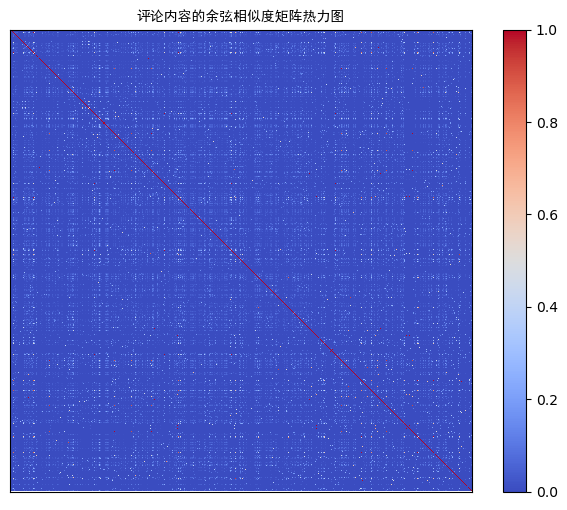

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 设置字体属性
font_path = "C:\\Windows\\Fonts\\SimHei.ttf"  # Windows路径
font_prop = FontProperties(fname=font_path)


# 可视化相似度矩阵
plt.figure(figsize=(8, 6))
plt.imshow(cosine_similarities, interpolation='nearest', cmap='coolwarm')
plt.colorbar()
plt.title('评论内容的余弦相似度矩阵热力图', fontproperties=font_prop)
# 不显示坐标轴上的标签
plt.xticks([])
plt.yticks([])

plt.tick_params(axis='both', which='both', length=0)  # 隐藏刻度线

# 保存图表
output_path = r'D:\MINE\大数据分析综合实验\大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析\可视化\余弦相似度热力图.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


km算法对余弦相似度的计算结果进行聚类分析

In [38]:
from sklearn.cluster import KMeans
kms2 = KMeans(n_clusters=10, random_state=123)
k_dataYX= kms2.fit_predict(cosine_similarities)
# k_dataYX = kms2.labels_

k_dataYX

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 1, 2, ..., 3, 1, 1])

In [46]:

# 计算 k_data 和 label 中每个不同数字的个数
unique_k, counts_k = np.unique(k_data, return_counts=True)
unique_YX, counts_label = np.unique(k_dataYX, return_counts=True)

# 创建 pandas DataFrame
df_k_data = pd.DataFrame({'Value': unique_k, 'Frequency': counts_k})
df_YX = pd.DataFrame({'Value': unique_YX, 'Frequency': counts_label})

# 打印表格
print("欧式距离")
print(df_k_data)
print("余弦相似度")
print(df_YX)

欧式距离
   Value  Frequency
0      0         26
1      1        498
2      2         52
3      3        283
4      4        357
5      5         41
6      6        178
7      7         68
8      8        164
9      9       1924
余弦相似度
   Value  Frequency
0      0         45
1      1       1996
2      2        473
3      3        151
4      4         26
5      5         62
6      6        553
7      7        218
8      8         40
9      9         27


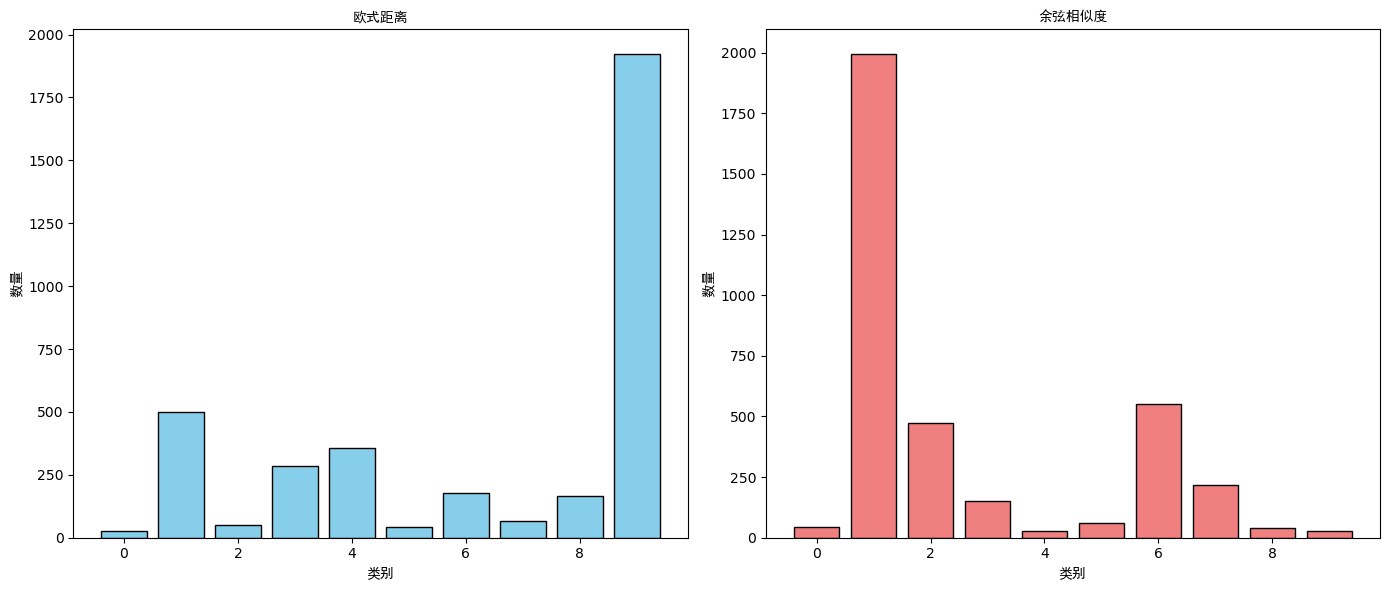

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 设置字体属性
font_path = "C:\\Windows\\Fonts\\SimHei.ttf"  # Windows路径
font_prop = FontProperties(fname=font_path)


# 计算 k_data 和 label 中每个不同数字的个数
unique_k, counts_k = np.unique(k_data, return_counts=True)
unique_yx, counts_yx = np.unique(k_dataYX, return_counts=True)

# 创建子图
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 绘制 k_data 的柱状图
ax[0].bar(unique_k, counts_k, color='skyblue', edgecolor='black')
ax[0].set_title('欧式距离', fontproperties=font_prop)
ax[0].set_xlabel('类别', fontproperties=font_prop)
ax[0].set_ylabel('数量', fontproperties=font_prop)

# 绘制 label 的柱状图
ax[1].bar(unique_yx, counts_yx, color='lightcoral', edgecolor='black')
ax[1].set_title('余弦相似度', fontproperties=font_prop)
ax[1].set_xlabel('类别', fontproperties=font_prop)
ax[1].set_ylabel('数量', fontproperties=font_prop)


# 调整布局
plt.tight_layout()

# 保存图表
output_path = r'D:\MINE\大数据分析综合实验\大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析\可视化\欧式距离vs余弦相似度.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')


# 显示图表
plt.show()

In [48]:
X1 = cosine_similarities

from sklearn.datasets import make_blobs  
import joblib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46
k: 47
k: 48
k: 49
k: 50
k: 51
k: 52
k: 53
k: 54
k: 55
k: 56
k: 57
k: 58
k: 59


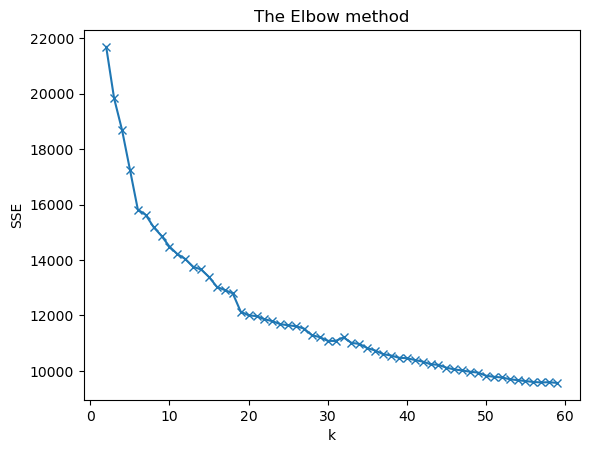

In [50]:
# 手肘法

SSE = []
k_min = 2
k_max = 60
for k in range(k_min, k_max):
    print("k:", k)
    kmeans_model = KMeans(n_clusters=k, n_init='auto',random_state=10)
    kmeans_model.fit(X1)
    SSE.append(kmeans_model.inertia_)
# 绘图
plt.figure()
plt.plot(range(k_min, k_max), SSE, marker='x')    
plt.title('The Elbow method')
plt.xlabel('k')
plt.ylabel('SSE')

# 保存图表
output_path = r'D:\MINE\大数据分析综合实验\大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析\可视化\手肘法.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


k: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 11


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 12


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 13


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 14


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 16


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 17


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 18


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 19


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 20


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 21


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 22


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 23


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 24


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 26


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 27


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 28


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 29


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 30


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 31


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 32


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 33


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 34


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 35


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 36


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 37


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 38


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 39


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 40


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 41


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 42


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 43


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 44


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 45


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 46


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 47


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 48


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 49


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 50


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 51


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 52


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 53


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 54


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 55


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 56


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 57


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 58


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 59


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


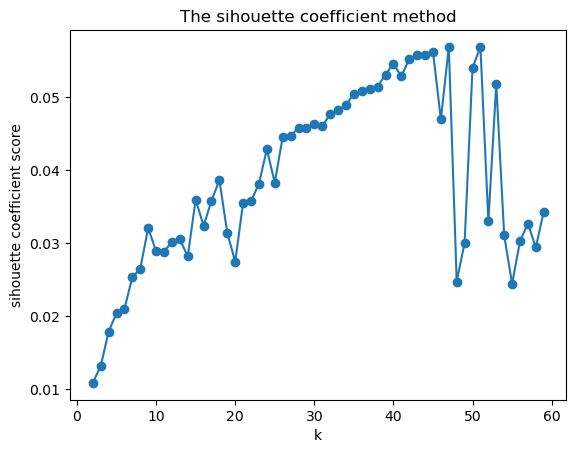

In [51]:
# 轮廓系数法，确定K值
SC = []
k_min = 2  # 轮廓系数必须从2开始
k_max = 60
for k in range(k_min, k_max):
    print("k:", k)
    kmeans_model = KMeans(n_clusters=k, random_state=10)
    kmeans_model.fit(tfidf)
    sc_score  = silhouette_score(tfidf, kmeans_model.labels_)
    SC.append(sc_score)
# 绘图
plt.figure()
plt.plot(range(k_min, k_max), SC, marker='o')    
plt.title('The sihouette coefficient method')
plt.xlabel('k')
plt.ylabel('sihouette coefficient score')

# 保存图表
output_path = r'D:\MINE\大数据分析综合实验\大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析\可视化\轮廓系数法.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

k: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 11


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 12


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 13


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 14


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 16


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 17


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 18


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 19


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 20


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 21


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 22


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 23


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 24


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 26


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 27


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 28


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 29


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 30


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 31


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 32


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 33


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 34


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 35


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 36


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 37


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 38


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 39


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 40


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 41


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 42


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 43


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 44


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 45


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 46


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 47


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 48


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 49


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 50


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 51


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 52


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 53


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 54


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 55


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 56


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 57


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 58


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 59


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


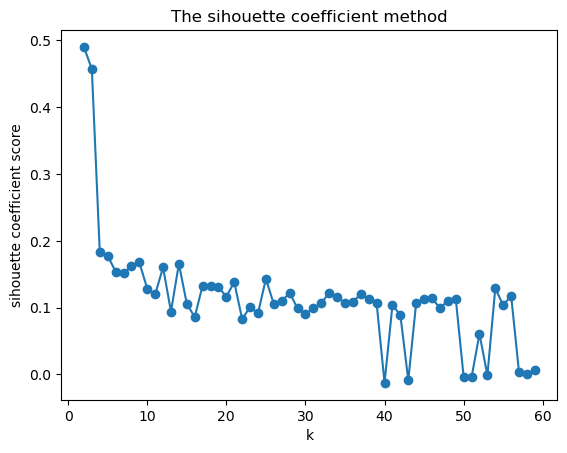

In [49]:
# # 轮廓系数法用余弦相似度预测，确定K值
# SC = []
# k_min = 2  # 轮廓系数必须从2开始
# k_max = 60
# for k in range(k_min, k_max):
#     print("k:", k)
#     kmeans_model = KMeans(n_clusters=k, random_state=10)
#     kmeans_model.fit(cosine_similarities)
#     sc_score  = silhouette_score(cosine_similarities, kmeans_model.labels_)
#     SC.append(sc_score)
# # 绘图
# plt.figure()
# plt.plot(range(k_min, k_max), SC, marker='o')    
# plt.title('The sihouette coefficient method')
# plt.xlabel('k')
# plt.ylabel('sihouette coefficient score')
# plt.show()